In [1]:
import plaidml.keras

plaidml.keras.install_backend()



In [2]:

import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical
import tensorflow as tf
from keras.models import load_model
from keras import backend as k

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_s_test, y_s_test = x_test, y_test

    

(60000, 28, 28)

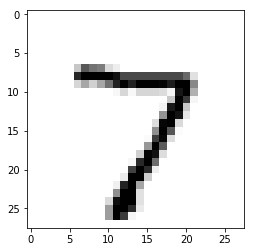

In [3]:
plt.imshow(x_s_test[0], cmap="Greys")

x_train.shape

In [4]:
x_train, x_test = x_train.reshape(60000,28,28,1), x_test.reshape(10000,28,28,1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [5]:
model = Sequential()

model.add(Conv2D(128, kernel_size=3, activation="relu", input_shape=(28, 28 ,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=None))
model.add(Conv2D(64,kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=None))
model.add(Conv2D(64,kernel_size=3, activation="relu"))
model.add(Conv2D(64,kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(1,1),strides=None))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/5


INFO:plaidml:Analyzing Ops: 118 of 436 operations complete


60000/60000 [==============================] - 47s 785us/step - loss: 0.2790 - acc: 0.9130 - val_loss: 0.0595 - val_acc: 0.9839
Epoch 2/5
60000/60000 [==============================] - 34s 566us/step - loss: 0.0740 - acc: 0.9805 - val_loss: 0.0664 - val_acc: 0.9850
Epoch 3/5
60000/60000 [==============================] - 34s 565us/step - loss: 0.0578 - acc: 0.9850 - val_loss: 0.0459 - val_acc: 0.9874
Epoch 4/5
60000/60000 [==============================] - 34s 561us/step - loss: 0.0483 - acc: 0.9875 - val_loss: 0.0405 - val_acc: 0.9885
Epoch 5/5
60000/60000 [==============================] - 34s 562us/step - loss: 0.0378 - acc: 0.9902 - val_loss: 0.0477 - val_acc: 0.9890


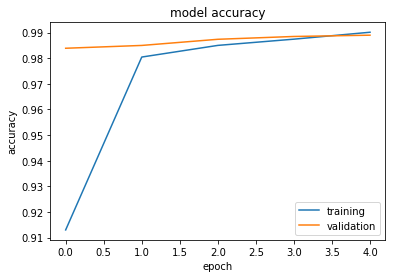

Test loss: 0.0477
Test accuracy: 0.989


In [6]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, verbose=1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)



plt.plot(history.history["acc"])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')